In [10]:
import sys
import numpy as np

In [32]:
#first video with single neuron
inputs=[1.2,5.1,2.1]
weights=[3.1,2.1,8.7]
bias=3
output=inputs[0]*weights[0]+inputs[1]*weights[1]+inputs[2]*weights[2]+bias
print(output)
weights

35.7


[3.1, 2.1, 8.7]

In [34]:
#second video
inputs=np.array([1.0,2.0,3,2.5]) #length of single sample gives no of features
# weights1=[0.2,0.8,0.5,1.0]
# weights2=[0.5,0.91,0.26,-0.5]
# weights3=[0.26,-0.27,0.17,0.87]
#size of weight amtrix=no0fNeurons*sizeOfInput
weights=np.array([[0.2,0.8,0.5,1.0],[0.5,0.91,0.26,-0.5],[0.26,-0.27,0.17,0.87]]) #matrix containing vectors
# bias1=2        #3 neurons
# bias2=3
# bias3=0.5
biases=np.array([2,3,0.5])
output=np.dot(weights,inputs)+biases
print(output)



[7.8   4.85  2.905]


In [44]:
biases=[2,3,0.5]
output=np.dot(inputs,weights)+biases


ValueError: shapes (4,) and (3,4) not aligned: 4 (dim 0) != 3 (dim 0)

In [26]:
import numpy as np
#batch of inputs
inputs=[[1,2,3,2.5],    
        [2.0,5.0,-1.0,2.0],
        [-1.5,2.7,3.3,-0.8]]
weights1=[[0.2,0.8,-0.5,1.0],
        [0.5,-0.91,0.26,-0.5],
         [-0.26,-0.27,0.17,0.87]]    #size of weight matrix is (numberofNeurons*inputfeatures)
biases1=[2,3,0.5]
#output=np.dot(weights,inputs)+biases
layer1_outputs=np.dot(inputs,np.array(weights1).T)+biases1
#now we add another layer of neurons and we need set of weights and baises
weights2=[[0.1,-0.14,0.5],
        [-0.5,0.12,-0.33],
         [-0.44,0.73,-0.13]]
biases2=[-1,2,-0.5]
layer2_outputs=np.dot(layer1_outputs,np.array(weights2).T)+biases2
print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [35]:
# let us work in anther way to create neurons (objects)
np.random.seed(0)
X=[[1,2,3,2.5],    
  [2.0,5.0,-1.0,2.0],
  [-1.5,2.7,3.3,-0.8]]
class Layer_Dense:
    def __init__(self,n_inputs,n_neurons):
        self.weights=np.random.randn(n_inputs,n_neurons)  #to avoid doing tranpose, we write (n_inputs*n_neurons)
        self.biases=np.zeros((1,n_neurons))  #pass the parameter as shape
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases
class Activation_ReLu:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)
        
layer1=Layer_Dense(4,5)
layer2=Layer_Dense(5,2)
layer1.forward(X)
print(layer1.output)
layer2.forward(layer1.output)
print(layer2.output)
    

[[ 1.07581312 10.39835225  2.44624108  3.1821498   1.88510534]
 [-0.83497962  7.08464114  0.02933567  4.47015253  3.63605378]
 [-5.07632447  5.56884223  0.79877967 -3.48895731  0.45530423]]
[[14.82959991 -8.39760189]
 [14.10031472 -1.3404687 ]
 [20.12497867 -7.29061598]]


In [39]:
#video 5
import numpy as np
np.random.seed(0)
X=[[1,2,3,2.5],
  [2.0,5.0,-1.0,2.0],
  [-1.5,2.7,3.3,-0.8]]
inputs=[0,2,-1,3.3,-2.7,1.1,2.2,-100]
output=[]
for i in inputs:
    output.append(max(0,i))
#     if i>0:
#         output.append(i)
#     elif i<=0:
#         output.append(0)
print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [42]:
#create a dataset cs231n stanford university
def create_data(points,classes):
    X=np.zeros((points*classes,2))
    y=np.zeros(points*classes,dtype='uint8')
    for class_number in range(classes):
        ix=range(points*class_number,points*(class_number+1))
        r=np.linspace(0.0,1,points) #radius
        t=np.linspace(class_number*4,(class_number+1)*4,points)+np.random.randn(points)*0.2
        X[ix]=np.c_[r*np.sin(t*2.5),r*np.cos(t*2.5)]
        y[ix]=class_number
    return X,y
import matplotlib.pyplot as plt
print("here")
X,y=create_data(100,3)

here


In [45]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
np.random.seed(0)
X=[[1,2,3,2.5],    
  [2.0,5.0,-1.0,2.0],
  [-1.5,2.7,3.3,-0.8]]
X,y=spiral_data(100,3)
class Layer_Dense:
    def __init__(self,n_inputs,n_neurons):
        self.weights=np.random.randn(n_inputs,n_neurons)  #to avoid doing tranpose, we write (n_inputs*n_neurons)
        self.biases=np.zeros((1,n_neurons))  #pass the parameter as shape
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases
class Activation_ReLu:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)
        
layer1=Layer_Dense(2,5)
activation1=Activation_ReLu()
layer1.forward(X)
# print(layer1.output)
activation1.forward(layer1.output)
print(activation1.output)
# layer2.forward(layer1.output)
# print(layer2.output)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504526e-03
  4.56845892e-04]
 [0.00000000e+00 5.93467943e-04 0.00000000e+00 2.03573189e-03
  6.10024276e-03]
 ...
 [1.13291515e+00 0.00000000e+00 0.00000000e+00 8.11079627e-01
  0.00000000e+00]
 [1.34588354e+00 0.00000000e+00 3.09493973e-01 5.66337522e-01
  0.00000000e+00]
 [1.07817915e+00 0.00000000e+00 0.00000000e+00 8.72561871e-01
  0.00000000e+00]]


In [61]:
#video 6 Softmax activation function
import math
import numpy as np
layer_outputs=[[4.8,1.21,2.385],
              [8.9,-1.81,0.21],
              [1.41,1.051,0.026]]
#E=math.e

exp_values=np.exp(layer_outputs)
#print(np.sum(layer_outputs,axis=1,keepdims=True))
norm_values=exp_values/np.sum(exp_values,axis=1,keepdims=True)
#norm_values=exp_values/np.sum(exp_values)
#print(exp_values)
#norm_values=exp_values/np.sum(exp_values)
print(norm_values)
# for output in layer_outputs:
#     exp_values.append(E**output)
# print(exp_values)
# norm_base=sum(exp_values)
# norm_values=[]
# for value in exp_values:
#     norm_values.append(value/norm_base)
#print(norm_values)
#print(sum(norm_values))

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99809456e-01 2.23163590e-05 1.68227965e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


In [12]:
#video seven (7)
'''
   Log defintionl: solving for x e**x=b.

'''
import numpy as np
b=5.2
#print(np.log(b))
#cross entropy loss fucntion: -predicted_output*log(target_output)
softmax_output=[0.7,0.1,0.2]
target_output=[1,0,0]
loss=-(math.log(softmax_output[0])*target_output[0]+math.log(softmax_output[1])*target_output[1]+
       math.log(softmax_output[2])*target_output[2])
print(loss)

0.35667494393873245


In [8]:
import math
print(math.e**1.6486586255873816)

5.199999999999999


In [32]:
 #video no 8  Implementing loss
softmax_outputs=[[0.7,0.1,0.2],[0.1,0.5,0.4],[0.02,0.9,0.08]]
class_targets=[0,1,1]
# for targ_idx,distribution in zip(class_targets,softmax_outputs):
#     print(distribution[targ_idx])
#using numpy

import numpy as np
softmax_outputs=np.array([[0.7,0.1,0.2],[0.1,0.5,0.4],[0.02,0.9,0.08]])
class_targets=[0,1,1]
#print(softmax_outputs[[0,1,2],class_targets])
#print using the range fucntion
# print(softmax_outputs[
#     range(len(softmax_outputs)),class_targets
# ])
print(-np.log(softmax_outputs[
    range(len(softmax_outputs)),class_targets
]))

[0.35667494 0.69314718 0.10536052]


In [31]:
range(len(softmax_outputs))

range(0, 3)

In [17]:
xx

In [39]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
np.random.seed(0)
X=[[1,2,3,2.5],    
  [2.0,5.0,-1.0,2.0],
  [-1.5,2.7,3.3,-0.8]]

class Layer_Dense:
    def __init__(self,n_inputs,n_neurons):
        self.weights=np.random.randn(n_inputs,n_neurons)  #to avoid doing tranpose, we write (n_inputs*n_neurons)
        self.biases=np.zeros((1,n_neurons))  #pass the parameter as shape
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases
class Activation_ReLu:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)
class Activation_Softmax:
    def forward(self,inputs):
        exp_values=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        probabilities=exp_values/np.sum(exp_values,axis=1,keepdims=True)
        self.output=probabilities
class Loss:
    def calculate(self,output,y):
        sample_losses=self.forward(output,y)
        data_loss=np.mean(sample_losses)
        return data_loss
class Loss_CategoricalCrossentropy(Loss):
    def forward(self,y_pred,y_true):
        samples=len(y_pred)
        y_pred_clipped=np.clip(y_pred,1e-7,1-1e-7)
        #[1,0]   scaled values
        #[[0,1],[1,0]] one-hot encoded values
        if len(y_true.shape)==1:
            correct_confidences=y_pred_clipped[range(samples),y_true]
        elif len(y_true.shape)==2:
            correct_confidences=np.sum(y_pred_clipped*y_true,axis=1)
        negative_log_likelihoods=-np.log(correct_confidences)
        return negative_log_likelihoods
X,y=spiral_data(100,3)       
dense1=Layer_Dense(2,5)
activation1=Activation_ReLu()

dense2=Layer_Dense(3,3)
activation2=Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

# print(layer1.output)
loss_function=Loss_CategoricalCrossentropy()
loss=loss_function.output(activation2.output,y)
print("Loss:",loss)
# layer2.forward(layer1.output)
# print(layer2.output)

ValueError: shapes (300,5) and (3,3) not aligned: 5 (dim 1) != 3 (dim 0)

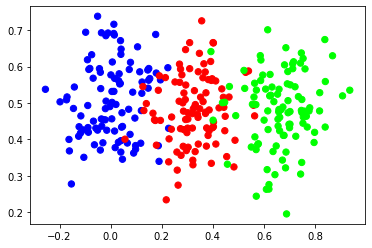

In [2]:
#video no 9
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
X,y=vertical_data(samples=100,classes=3)
plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap='brg')
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
def f(x):
    return 2**x
x=np.array(range(5))
y=f(x)
print(x)
print(y)


[0 1 2 3 4]
[ 1  2  4  8 16]


In [7]:
x

array([0, 1, 2, 3, 4])

In [8]:
def f(x):
    return 2**x+2
x=np.array(range(5))
y=f(x)
print(x)
print(y)

[0 1 2 3 4]
[ 1  2  4  8 16]


In [10]:
def f(x):
    return 2*x**2
p2_delta=0.0001
x1=1
x2=x1+p2_delta
y1=f(x1)
y2=f(x2)
approximate_derivative=(y2-y1)/(x2-x1)
print(approximate_derivative)

4.0001999999987845


(0, 0) (0.0001, 2e-08)


TypeError: approximate_tangent_line() takes 1 positional argument but 3 were given

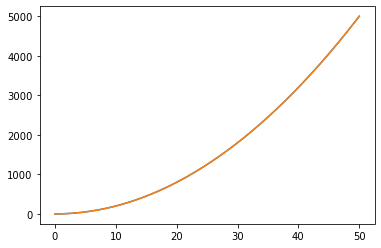

In [30]:
def f1(x):
    return 2*x**2
def f2(x):
    return 2*x
# x=np.arange(0,50,0.10)

# y1=f1(x)
# y2=f2(x)
# plt.plot(x,y1)
# plt.show()

# plt.plot(x,y2)
# plt.show()
x=np.arange(0,50,0.001)
y=f1(x)
plt.plot(x,y)
plt.plot(x,y)
colors=['k','g','r','b','c']
def approximate_tangent_line(x):
    return approximate_derivative*x+b
for i in range(5):
    p2_delta=0.0001
    x1=i
    x2=x1+p2_delta
    y1=f1(x1)
    y2=f1(x2)

    print((x1,y1),(x2,y2))
    approximate_derivatives=(y2-y1)/(x2-x1)
    b=y2-approximate_derivatives*x2


    to_plot=[x1-0.9,x1,x1+0.9]
    plt.plot(to_plot,
             [approximate_tangent_line(point,approximate_derivative,b) 
              for point in to_plot],
            c=colors[i])
    print('Approximate derivative for f(x)',
         f'where x={x1} is {approximate_derivative}')
    plt.show()


# approximate_derivatives=(y2-y1)/(x2-x1)